In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



**Importing the dataset**

In [ ]:
data=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dummy=pd.get_dummies(data['Gender'])

In [ ]:
df=pd.concat([data['User ID'],dummy,data.iloc[:,2:]],axis=1)

In [ ]:
df

,User ID,Female,Male,Age,EstimatedSalary,Purchased
0,15624510,0,1,19,19000,0
1,15810944,0,1,35,20000,0
2,15668575,1,0,26,43000,0
3,15603246,1,0,27,57000,0
4,15804002,0,1,19,76000,0
...,...,...,...,...,...,...
395,15691863,1,0,46,41000,1
396,15706071,0,1,51,23000,1
397,15654296,1,0,50,20000,1
398,15755018,0,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df.iloc[:,[3,4]]
y=df['Purchased']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
rfc.score(X_test,y_test)

0.8625

**Making the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


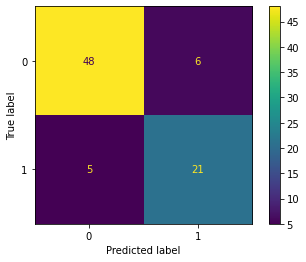

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,X_test,y_test);

**Visualising the Training set results**

In [ ]:
values=df['Purchased'].unique()
values

array([0, 1])

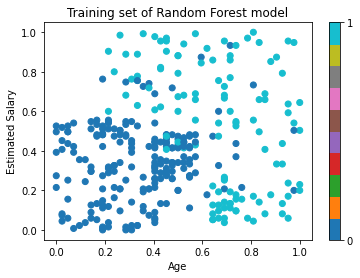

In [ ]:
#training set results
formatter = plt.FuncFormatter(lambda val, loc: values[val])
plt.scatter(X_train[:,0], X_train[:,1], c=rfc.predict(X_train), alpha=0.1, cmap='tab10')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='tab10')
plt.colorbar(ticks=range(len(values)), format=formatter)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training set of Random Forest model')
plt.show()

**Visualising the Test set results**

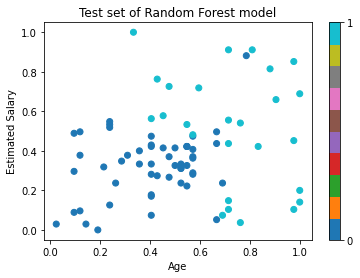

In [ ]:
formatter = plt.FuncFormatter(lambda val, loc: values[val])
plt.scatter(X_test[:,0], X_test[:,1], c=rfc.predict(X_test), alpha=0.1, cmap='tab10')
plt.scatter(X_test[:,[0]], X_test[:,[1]], c=y_test, cmap='tab10')
plt.colorbar(ticks=range(len(values)), format=formatter)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test set of Random Forest model')
plt.show()